In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
#importing dataset
df=pd.read_csv('/content/Wholesale customers data.csv')
print(df)

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
#checking for duplicate drows
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


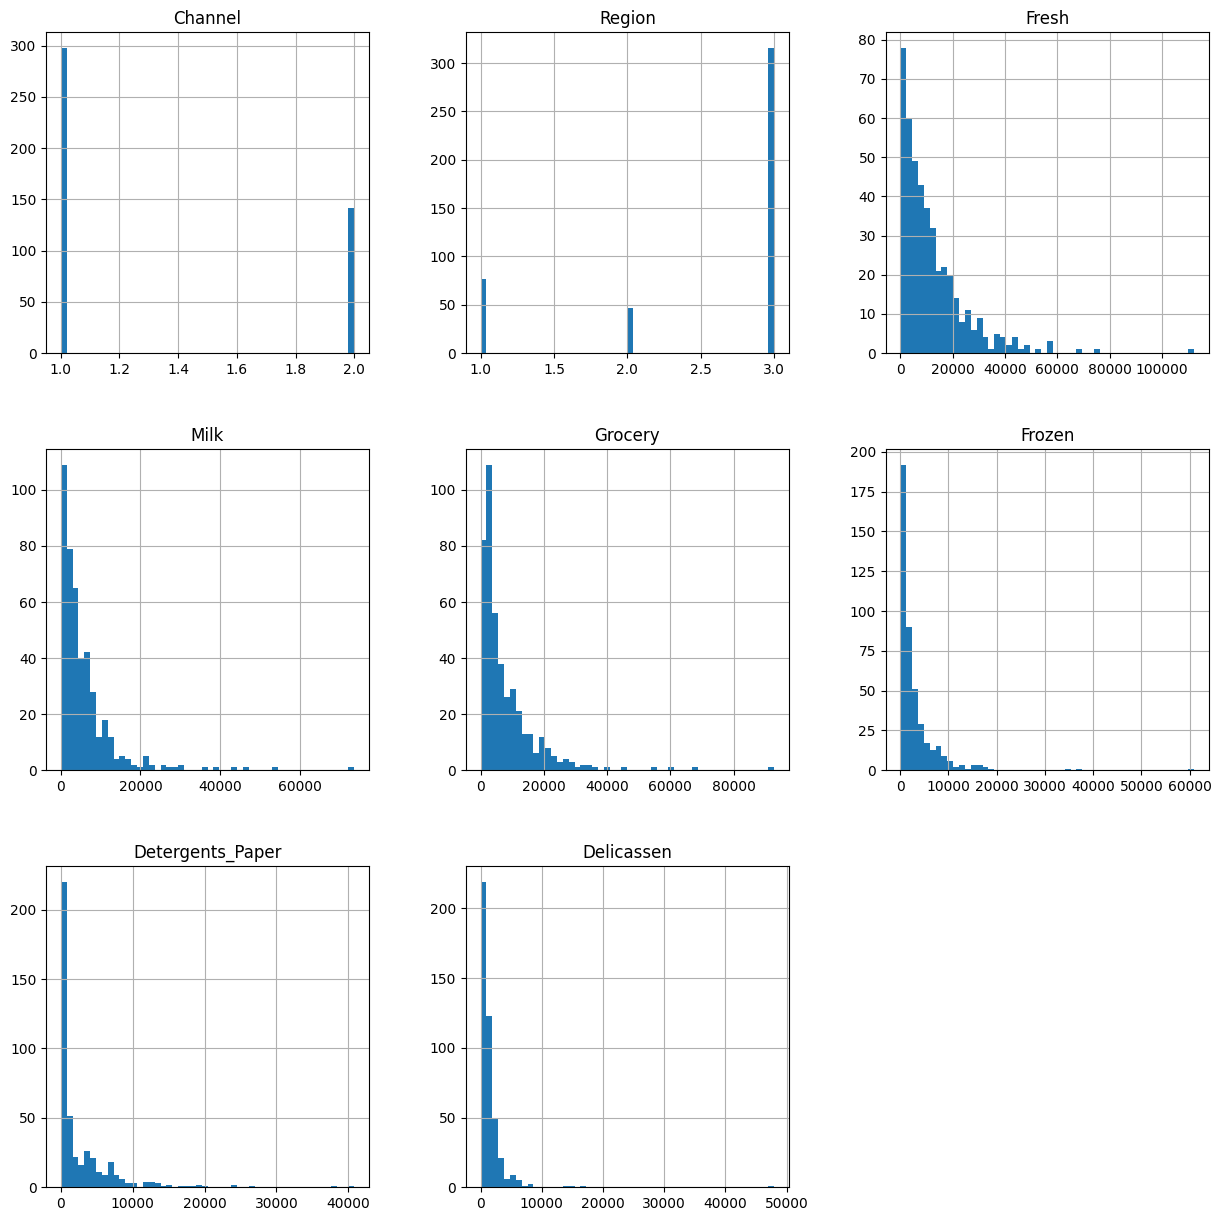

In [8]:
df.hist(figsize=(15,15), bins = 50)
plt.show()

<Axes: >

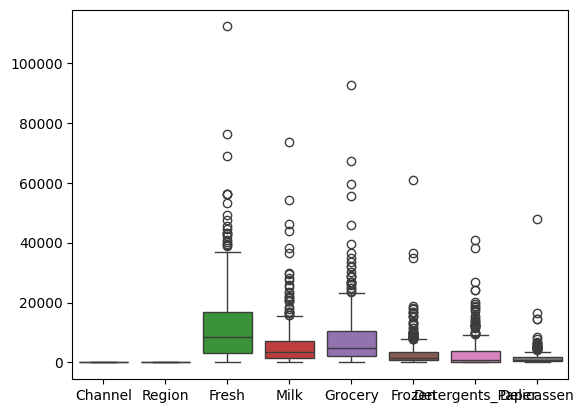

In [9]:
#Detecting for outliers
sns.boxplot(data=df)

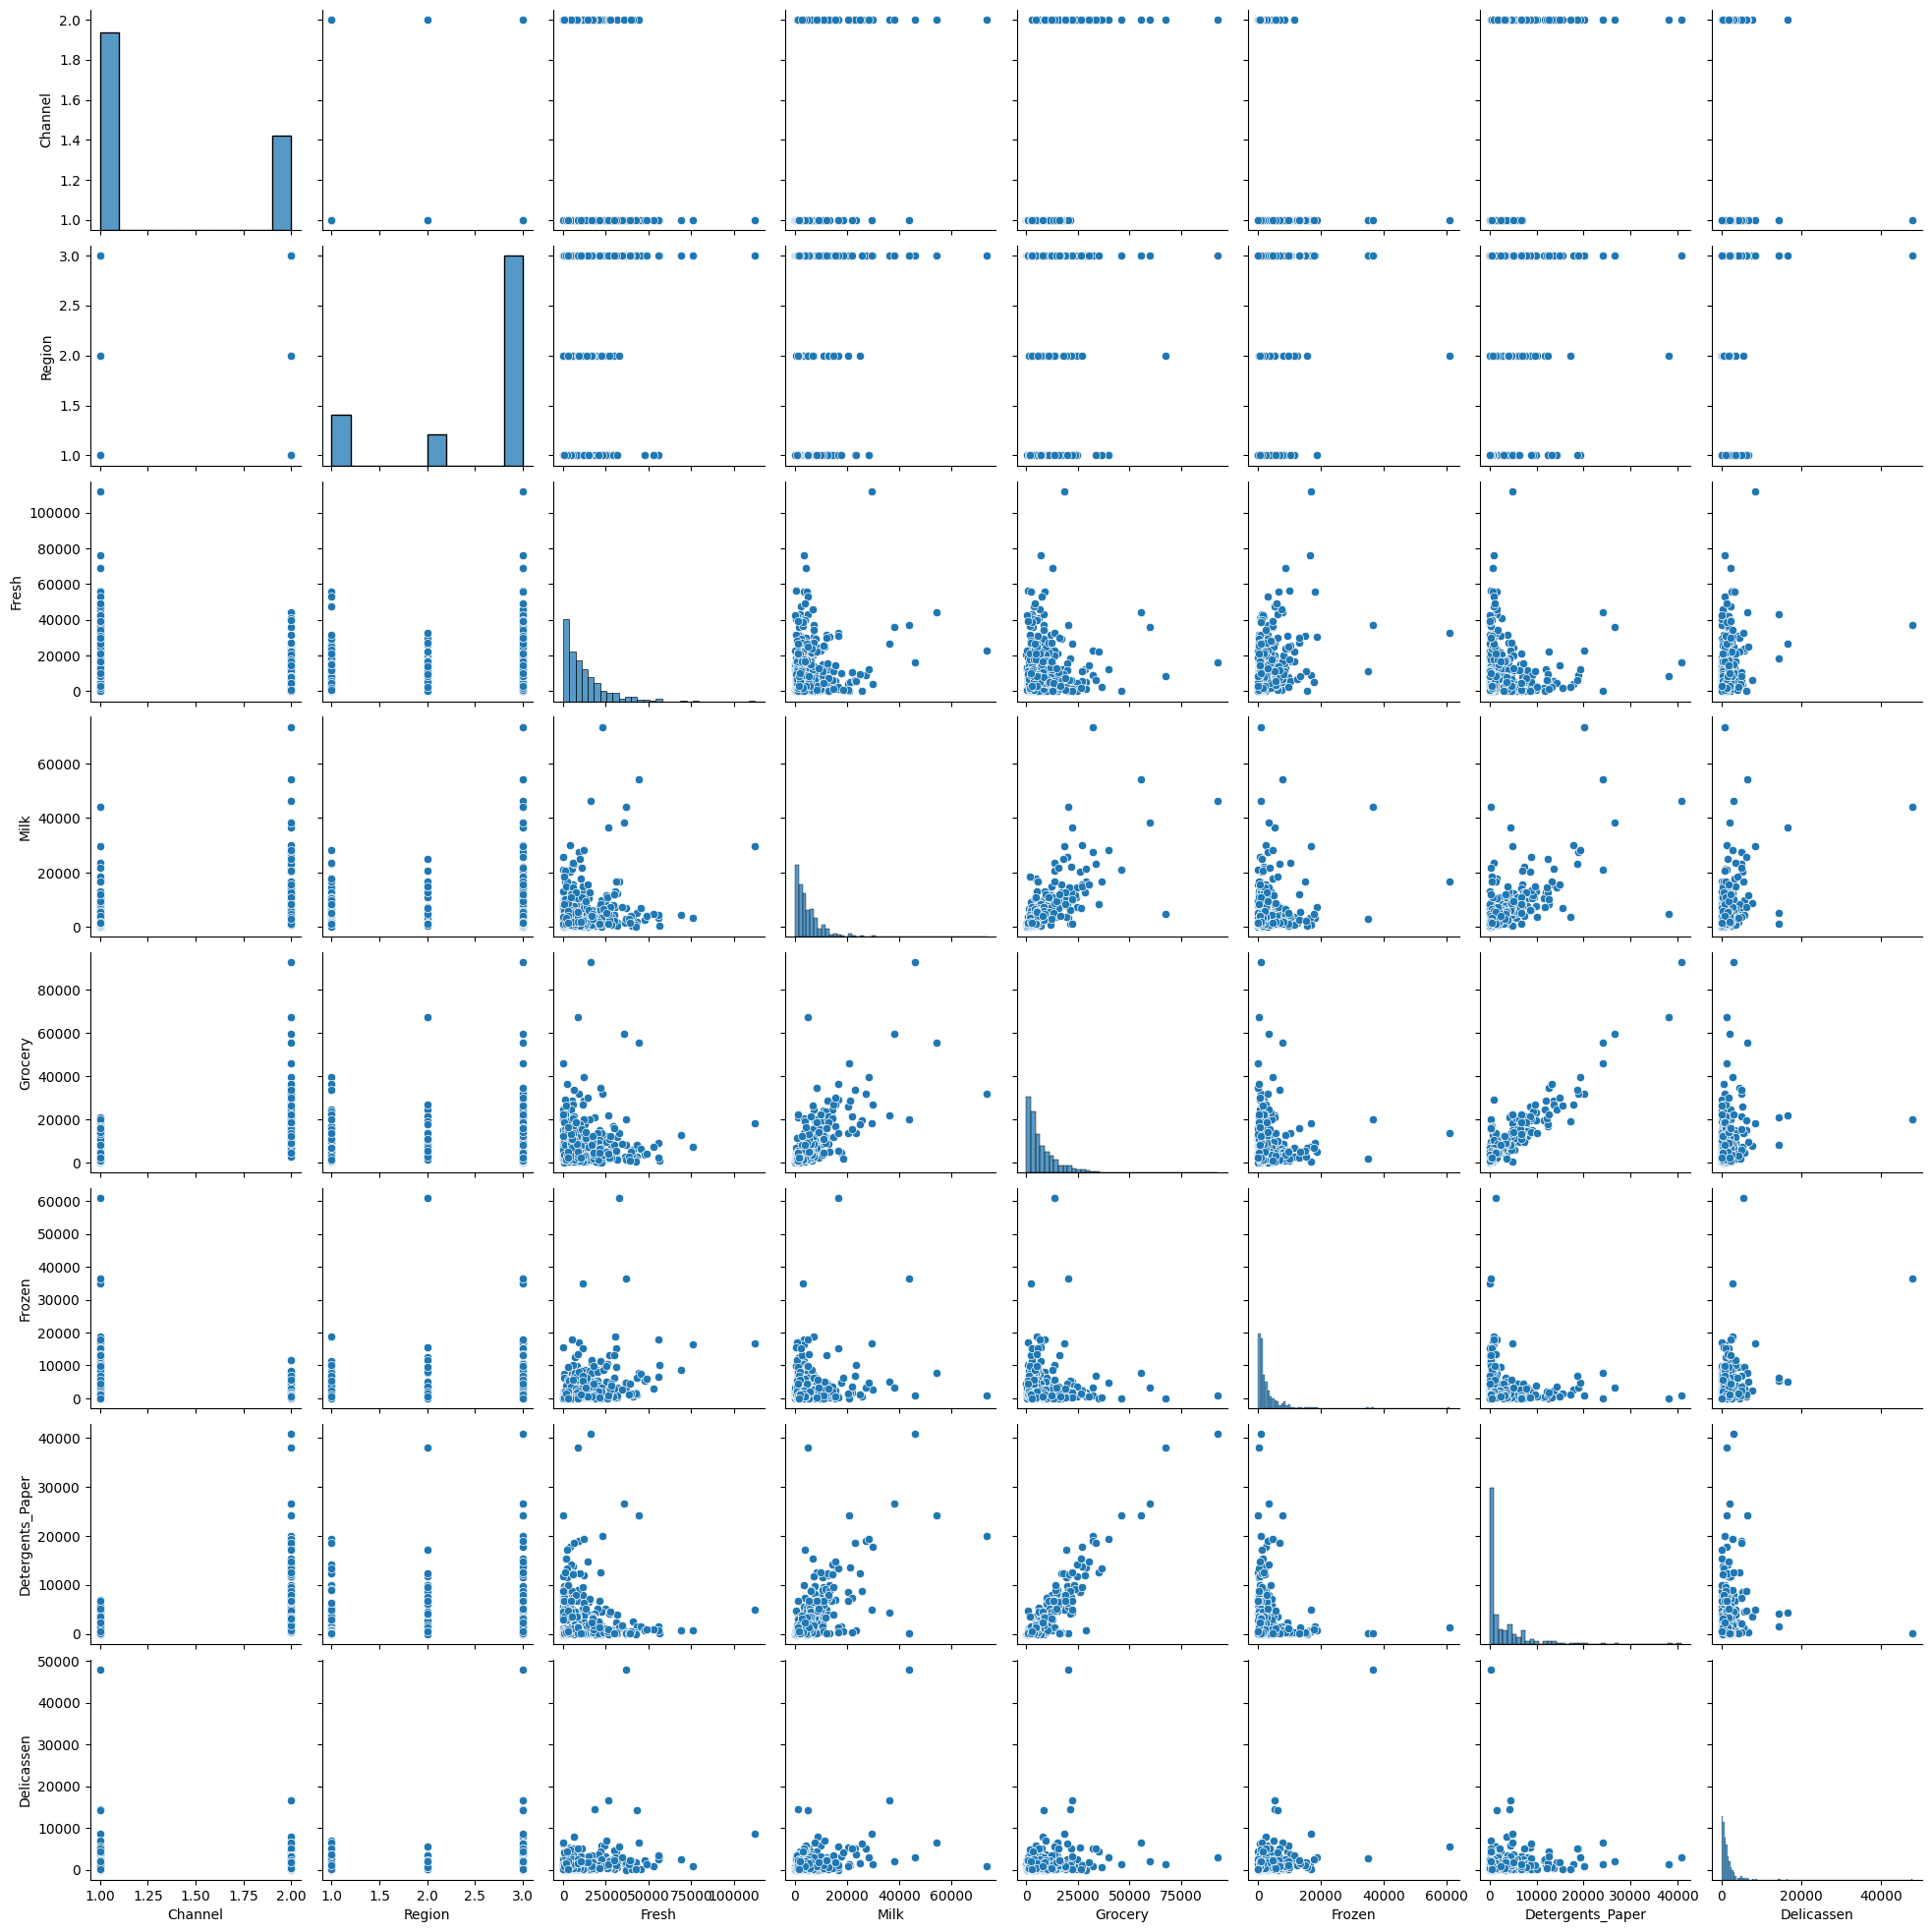

In [10]:
sns.pairplot(df)

In [11]:
#checking for single digit values in the entire dataset.
for column in df.columns:
     count = df.loc[df[column]< 10, column]
     print(column, count.shape)

Channel (440,)
Region (440,)
Fresh (3,)
Milk (0,)
Grocery (1,)
Frozen (0,)
Detergents_Paper (5,)
Delicassen (6,)


In [12]:
#Replacing the single digit values with the median of the features
for column in df.columns:

     if column != 'Channel' and column != 'Region':
        df.loc[df[column]< 10, column] = np.ceil(df[column].median())

In [13]:
#Scaling the dataset
x = df
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [14]:
#Applying K-means clustering
values = np.arange(1,15)
wcss_list = []
for k in values:
    cluster = KMeans(n_clusters=k,n_init=10,verbose=0)
    cluster.fit(x_scaled)
    wcss = cluster.inertia_
    wcss_list.append(wcss)
wcss_list

[3520.0000000000023,
 2599.4803096955584,
 2149.123574255927,
 1842.5530593974222,
 1545.7015140129906,
 1313.0574618028736,
 1172.6376306359452,
 1049.6218043075382,
 981.8163524543604,
 922.0504865334854,
 867.9229817773002,
 802.5245240351113,
 754.0810553579704,
 713.8519707923153]

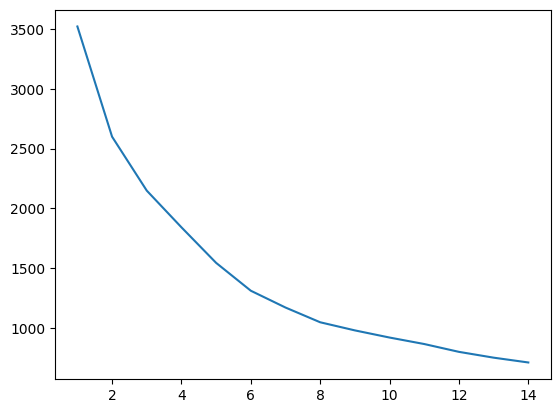

In [15]:
plt.plot(np.arange(1,15), wcss_list)
plt.show()

In [16]:
cluster = KMeans(n_clusters=4, n_init=10)
cluster.fit(x_scaled)
labels_1 = cluster.predict(x_scaled)
print(labels_1)

[3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 0 3 0 3 0 3 0 0 1 3 3 0 0 3 0 0 0 0 0 0 3 0
 3 3 0 0 0 3 3 3 3 3 1 3 3 0 0 3 3 0 0 1 3 0 0 3 1 3 3 0 1 0 3 0 0 0 0 0 3
 3 0 0 3 0 0 0 3 3 0 3 1 1 0 0 0 0 0 1 0 3 0 3 0 0 0 3 3 3 0 0 0 3 3 3 3 0
 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 3 3 0 3 3 3 0 0 3 3 3 3 0 0 0 3 3 0 3 0 3 0 0 0 0 0 1 0 1 0
 0 0 0 3 3 0 0 0 3 0 0 2 3 2 2 3 3 2 2 2 3 2 2 2 3 2 1 2 2 3 2 3 2 3 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 3 2 3 2 3 2 2 2 2 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 3 2 3
 2 3 3 2 3 3 3 3 3 3 3 2 2 3 2 2 3 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2
 1 2 3 2 2 2 2 3 3 0 3 0 0 3 3 0 3 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 3 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 3 3 0 0 0 0 0 0 3 3 0 3 0 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]


In [17]:
#Applying PCA for Visualization
p= PCA(n_components=2)
p_df = p.fit_transform(x_scaled)

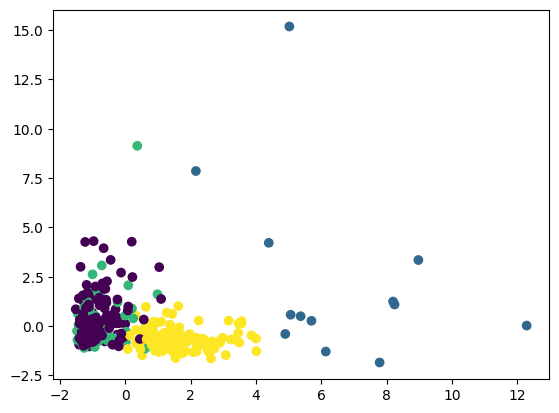

In [18]:
plt.scatter(p_df[:,0], p_df[:,1], c= labels_1)
plt.show()

In [19]:
#Applying Agglomerative Hierarchical Clustering
silhoutes = []

values = np.arange(2,15)
for k in values:
    cluster = AgglomerativeClustering(n_clusters= k,metric='euclidean', linkage='ward')
    cluster.fit(x_scaled)
    score = silhouette_score(x_scaled,cluster.labels_)
    silhoutes.append(score)
print(silhoutes)

[0.3682664444067027, 0.3603092326223517, 0.3625830391945849, 0.3181832543658315, 0.3441156046993276, 0.34969540253704595, 0.3544515884195328, 0.31374712718436265, 0.31988918653942844, 0.32453951474433135, 0.32051040544401876, 0.3213872113012559, 0.2890173736537348]


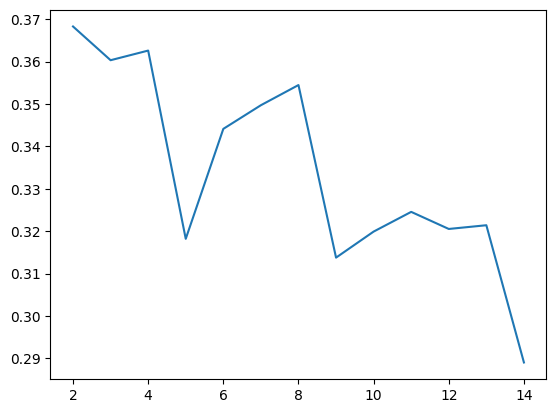

In [20]:
plt.plot(np.arange(2,15), silhoutes)
plt.show()

In [21]:
cluster = AgglomerativeClustering(n_clusters= 3,metric='euclidean', linkage='ward')
labels =cluster.fit_predict(x_scaled)
print(labels)

[2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 0 2 2 1 1 2 2 1 1 2 2 1 1 2 0 2 2 1 2 1 2 1 1 1 1 1 2
 2 1 1 2 1 1 1 2 2 1 2 0 0 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 0 1
 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 2 2 1 1 1 2 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 1
 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2
 1 2 2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1
 0 2 2 1 1 1 1 2 2 1 2 1 1 2 2 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]


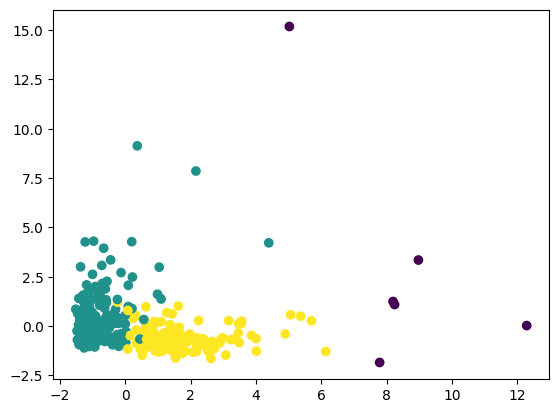

In [22]:
plt.scatter(p_df[:,0], p_df[:,1], c= labels)
plt.show()

In [23]:
#Applying DBScan
db = DBSCAN(eps= 2, min_samples= 3)

labels = db.fit_predict(x_scaled)
labels

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1,  0, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1

In [24]:
np.unique(labels)

array([-1,  0,  1])

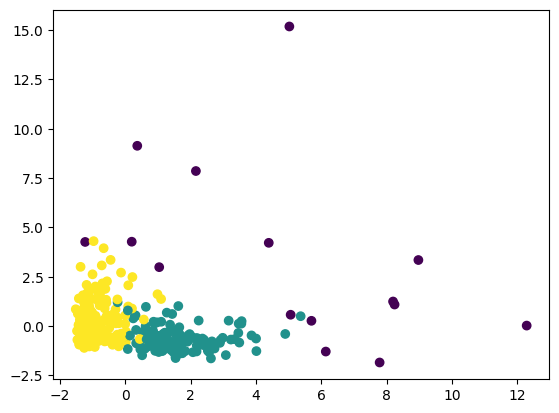

In [25]:
plt.scatter(p_df[:,0], p_df[:,1], c= labels)
plt.show()

In [26]:
silhouette_score(x_scaled,labels)

0.36548186058574184